Traitement du fichier CSV

In [8]:
import pandas as pd
import matplotlib.pyplot as plot
import json
import numpy as np

Lecture en brut du fichier CSV

In [9]:
data_df = pd.read_csv('data/styles.csv')
data_df.head()

id gender masterCategory subCategory  articleType baseColour  season   
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall  \
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt

<Axes: title={'center': 'Clothes sorted by year'}, xlabel='year'>

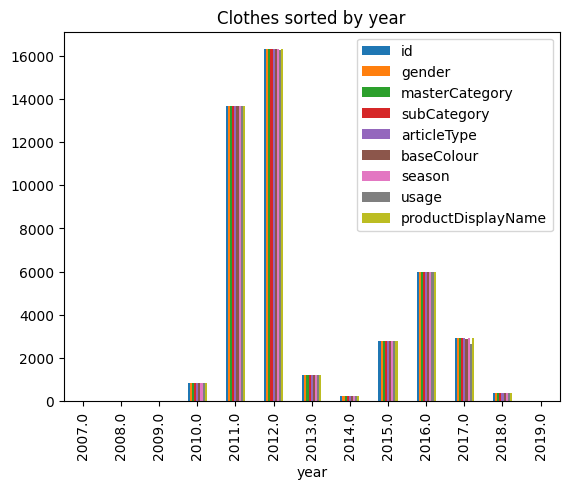

In [10]:
grouped = data_df.groupby("year").count()
grouped = grouped.rename(columns={"year":"count"}).reset_index()
grouped.plot(x=0, kind="bar", title="Clothes sorted by year")

Lecteur du fichier CSV en sélectionnant des colonnes

In [11]:
data_df = data_df.loc[:, ["id", "articleType", "baseColour", "productDisplayName" ]]
data_df.head()

id  articleType baseColour   
0  15970       Shirts  Navy Blue  \
1  39386        Jeans       Blue   
2  59263      Watches     Silver   
3  21379  Track Pants      Black   
4  53759      Tshirts       Grey   

                              productDisplayName  
0               Turtle Check Men Navy Blue Shirt  
1             Peter England Men Party Blue Jeans  
2                       Titan Women Silver Watch  
3  Manchester United Men Solid Black Track Pants  
4                          Puma Men Grey T-shirt

Lecteur du fichier CSV et l'associer avec la librairie d'images

In [12]:
df = pd.read_csv("data/styles.csv", nrows=5000)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

id gender masterCategory subCategory   articleType baseColour  season   
0  57304  Women       Footwear       Shoes         Heels      Brown  Winter  \
1  16555    Men        Apparel     Topwear       Tshirts  Navy Blue    Fall   
2  25314    Men    Accessories     Watches       Watches      Black  Winter   
3  17043    Men       Footwear       Shoes  Casual Shoes      Black  Summer   
4  11126  Women        Apparel  Bottomwear   Track Pants       Blue    Fall   
5  45251    Men    Accessories     Watches       Watches      Black  Winter   
6  40983   Boys        Apparel     Topwear       Tshirts      White  Summer   
7  36106    Men    Accessories     Wallets       Wallets      Black  Summer   
8  13214    Men       Footwear       Shoes  Sports Shoes      White    Fall   
9  33641    Men       Footwear  Flip Flops    Flip Flops      Black  Summer   

   year   usage                                 productDisplayName      image  
0  2012  Casual                           Rocia Women Brown Wedges  57304.jpg  
1  2011  Casual               Basics Men Navy Printed Polo T-shirt  16555.jpg  
2  2016  Casual  Casio Youth Series Men Digital Watch AE-1100W-...  25314.jpg  
3  2013  Casual                      Gas Men Skate 003 Casual Shoe  17043.jpg  
4  2011  Sports            Urban Yoga Women Solid Blue Track Pants  11126.jpg  
5  2016  Casual  Casio Youth Series Men Digital Watch W-734-1AV...  45251.jpg  
6  2012  Casual            Gini and Jony Boys United White T-shirt  40983.jpg  
7  2012  Casual                       OTLS Men Laurel Black Wallet  36106.jpg  
8  2011  Sports      ASICS Men Gel 1160 Running White Sports Shoes  13214.jpg  
9  2012  Casual                    Lotto Men Black Koro G Slippers  33641.jpg

Choose randomly an item from his id

In [13]:
import random
random.seed(10)

item_id = random.randint(data_df["id"].min(), data_df["id"].max())
item_id

38610

In [14]:
item_df = data_df[data_df["id"]==38610]
item_df

id articleType baseColour                    productDisplayName
39558  38610     Tshirts      Black  Nike Men Printed Cruis Black T-shirt

Drop the items that are not categorised

In [15]:
data_df.drop([0, 1], axis=0, inplace=True)
data_df.reset_index(drop=True, inplace=True)
data_df

id            articleType baseColour   
0      59263                Watches     Silver  \
1      21379            Track Pants      Black   
2      53759                Tshirts       Grey   
3       1855                Tshirts       Grey   
4      30805                 Shirts      Green   
...      ...                    ...        ...   
44439  17036           Casual Shoes      White   
44440   6461             Flip Flops        Red   
44441  18842                Tshirts       Blue   
44442  46694  Perfume and Body Mist       Blue   
44443  51623                Watches       Pink   

                                    productDisplayName  
0                             Titan Women Silver Watch  
1        Manchester United Men Solid Black Track Pants  
2                                Puma Men Grey T-shirt  
3                 Inkfruit Mens Chain Reaction T-shirt  
4                     Fabindia Men Striped Green Shirt  
...                                                ...  
44439                        Gas Men Caddy Casual Shoe  
44440               Lotto Men's Soccer Track Flip Flop  
44441             Puma Men Graphic Stellar Blue Tshirt  
44442                   Rasasi Women Blue Lady Perfume  
44443  Fossil Women Pink Dial Chronograph Watch ES3050  

[44444 rows x 4 columns]

Sort the article types

In [16]:
data_article_type_df = data_df.sort_values("id")
data_article_type_df.reset_index(drop=True, inplace=True)
data_article_type_df

id articleType baseColour   
0       1163     Tshirts       Blue  \
1       1164     Tshirts       Blue   
2       1165     Tshirts       Blue   
3       1525   Backpacks  Navy Blue   
4       1526   Backpacks      Black   
...      ...         ...        ...   
44439  59995     Dresses      Black   
44440  59996     Dresses     Purple   
44441  59998       Heels      Multi   
44442  59999       Heels     Bronze   
44443  60000      Kurtas       Blue   

                                     productDisplayName  
0      Nike Sahara Team India Fanwear Round Neck Jersey  
1               Nike Men Blue T20 Indian Cricket Jersey  
2                   Nike Mean Team India Cricket Jersey  
3                          Puma Deck Navy Blue Backpack  
4                           Puma Big Cat Backpack Black  
...                                                 ...  
44439                               Avirate Black Dress  
44440                      Avirate Black & Purple Dress  
44441                Catwalk Women Multi Coloured Heels  
44442                       Catwalk Women Bronze Wedges  
44443                             Alma Women Blue Kurta  

[44444 rows x 4 columns]

Display all article type

In [17]:
article_type_matrix = data_article_type_df.drop(["id"], axis=1)
article_type_matrix

articleType baseColour                                productDisplayName
0         Tshirts       Blue  Nike Sahara Team India Fanwear Round Neck Jersey
1         Tshirts       Blue           Nike Men Blue T20 Indian Cricket Jersey
2         Tshirts       Blue               Nike Mean Team India Cricket Jersey
3       Backpacks  Navy Blue                      Puma Deck Navy Blue Backpack
4       Backpacks      Black                       Puma Big Cat Backpack Black
...           ...        ...                                               ...
44439     Dresses      Black                               Avirate Black Dress
44440     Dresses     Purple                      Avirate Black & Purple Dress
44441       Heels      Multi                Catwalk Women Multi Coloured Heels
44442       Heels     Bronze                       Catwalk Women Bronze Wedges
44443      Kurtas       Blue                             Alma Women Blue Kurta

[44444 rows x 3 columns]